In [7]:
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.style.use('/Users/nik/Dropbox/Notebooks/talksrc.py')
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import glob
import os
import pandas as pd

In [8]:
fig_dir = '/Users/nik/Dropbox/Talks/DEFENSE/figures/'

Recreating some old plots of graphene and carbon nanotube bandstructures so that they are readable. 

Here is the old gnuplot code...

    set title "{/Symbol p}-Bands of Graphene (NNTB)"
    set zlabel "E(k)/{/Symbol g}_0" 2.0, 2.0
    set xlabel "k_xa"; set ylabel "k_ya"
    set nokey

    set size square
    set xrange [-5:5]
    set yrange [-5:5]
    set ticslevel 0
    set xtics ("-{/Symbol p}" -pi, "-{/Symbol p}/2" -pi/2, "0" 0, "{/Symbol p}/2" pi/2, "{/Symbol p}" pi)
    set ytics ("-{/Symbol p}" -pi, "-{/Symbol p}/2" -pi/2, "0" 0, "{/Symbol p}/2" pi/2, "{/Symbol p}" pi)
    set pm3d; set pm3d depthorder
    unset surface; unset colorbox
    set isosamples 200, 200
    set nogrid


    f(x,y) = 1 + 4*cos(y/2)*cos(y/2) + 4*cos(sqrt(3)*x/2)*cos(y/2)
    gamma = -1.0
    s = 0.0
    splot gamma*sqrt(f(x,y))/(1+s*sqrt(f(x,y))), -gamma*sqrt(f(x,y))/(1-s*sqrt(f(x,y))) 

In [3]:
def f(x,y):
    return 1 + 4*np.cos(3.0*x/2.0)*np.cos(np.sqrt(3)*y/2.0) + 4*np.cos(np.sqrt(3)*y/2.0)*np.cos(np.sqrt(3)*y/2.0)

def upper_band(x, y, gamma, s):
    return gamma*np.sqrt(f(x,y))/(1+s*np.sqrt(f(x,y)))

def lower_band(x, y, gamma, s):
    return -gamma*np.sqrt(f(x,y))/(1-s*np.sqrt(f(x,y)))

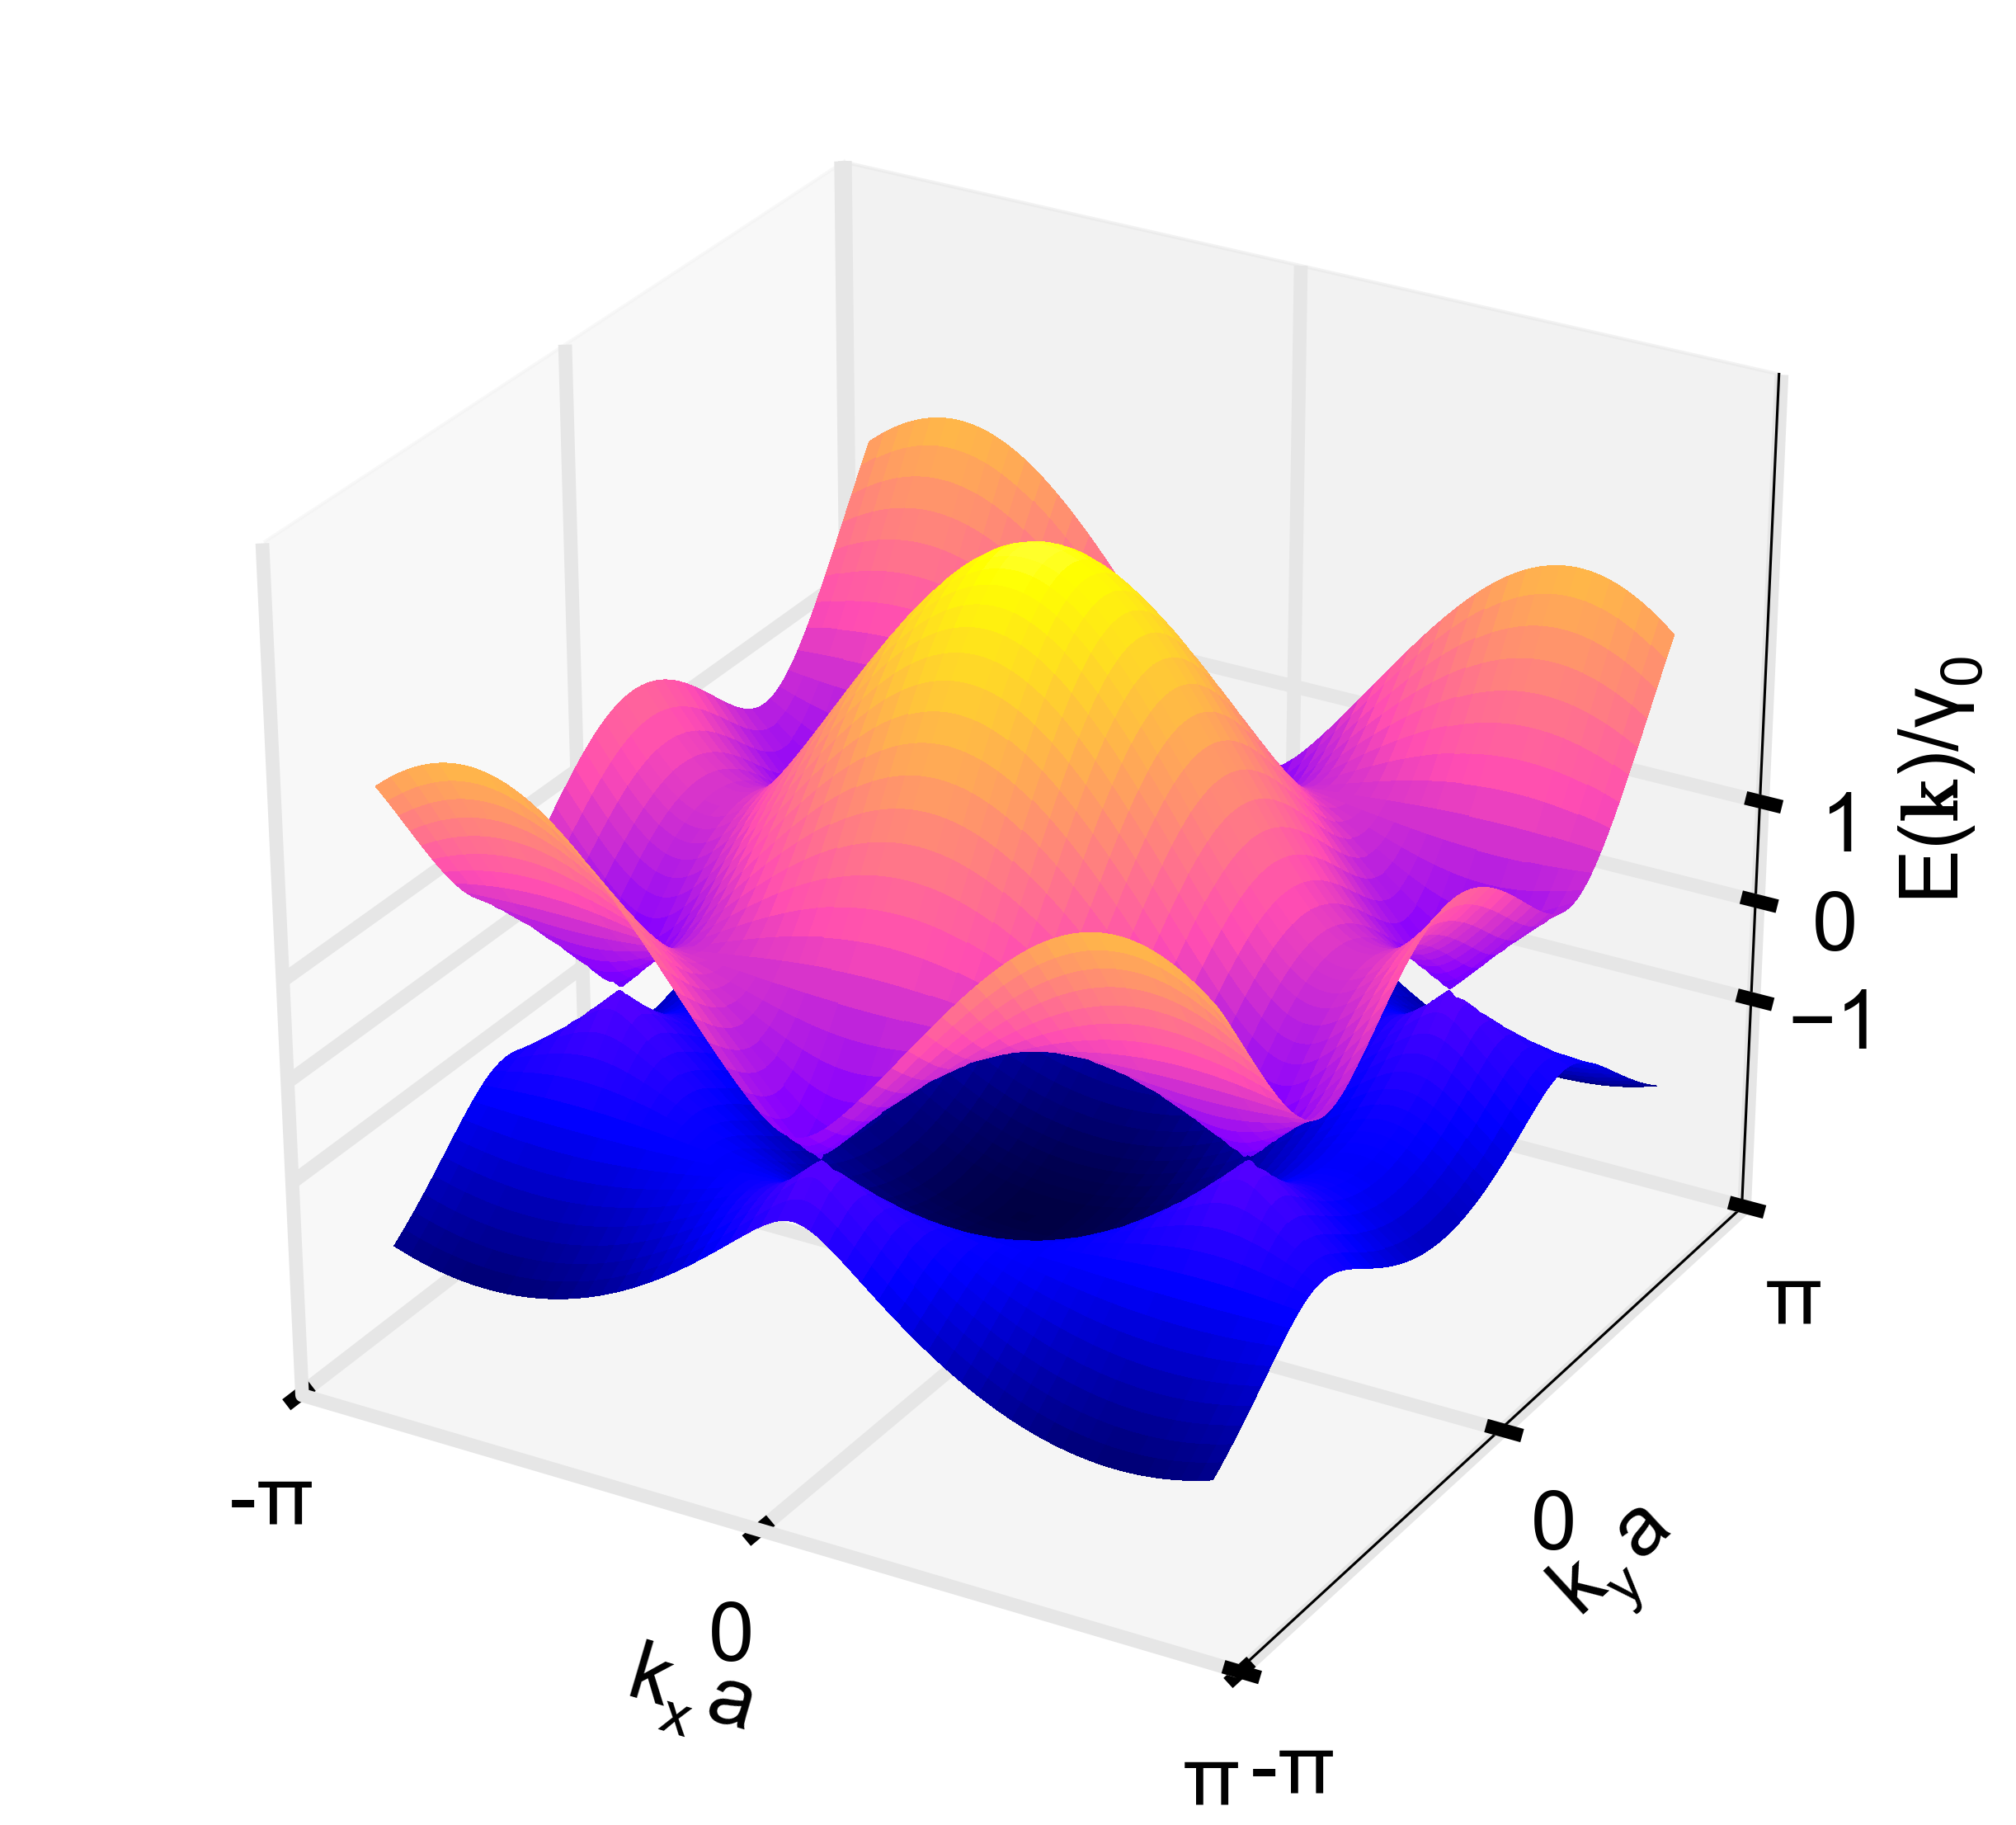

In [4]:
x = np.linspace(-np.sqrt(3)*np.pi/2, np.sqrt(3)*np.pi/2, 500)
y = np.linspace(-np.sqrt(3)*np.pi/2, np.sqrt(3)*np.pi/2, 500)
X,Y = np.meshgrid(x,y)

gamma = 1.0
s = -0.1

z_upper = np.array([upper_band(x,y,gamma,s) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z_upper = z_upper.reshape(X.shape)

z_lower = np.array([lower_band(x,y,gamma,s) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z_lower = z_lower.reshape(X.shape)

cmin = z_lower.min()-0.5
cmax = z_upper.max()+0.5

fig = plt.figure(figsize = (10,9))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z_upper, cmap = plt.cm.gnuplot2, vmin=cmin, vmax=cmax, 
                rstride=10, cstride=10, linewidth=0, antialiased=False)
ax.plot_surface(X, Y, Z_lower, cmap = plt.cm.gnuplot2, vmin=cmin, vmax=cmax, 
                rstride=10, cstride=10, linewidth=0, antialiased=False)

x_label = [r"$-\pi$", r"$0$", r"$\pi$"]
ax.set_xticks([-np.pi, 0, np.pi])
ax.set_xticklabels(x_label)

y_label = [r"$-\pi$", r"$0$", r"$\pi$"]
ax.set_yticks([-np.pi, 0, np.pi])
ax.set_yticklabels(y_label)

ax.set_zticks([-1, 0, 1])

ax.set_xlabel(r'$k_x a$', fontsize = 24)
ax.set_ylabel(r'$k_y a$', fontsize = 24)

ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$E(\mathbf{k})/\gamma_0$', rotation = 90, fontsize = 24)

fig.savefig(os.path.join(fig_dir, 'graphene_bands.png'))

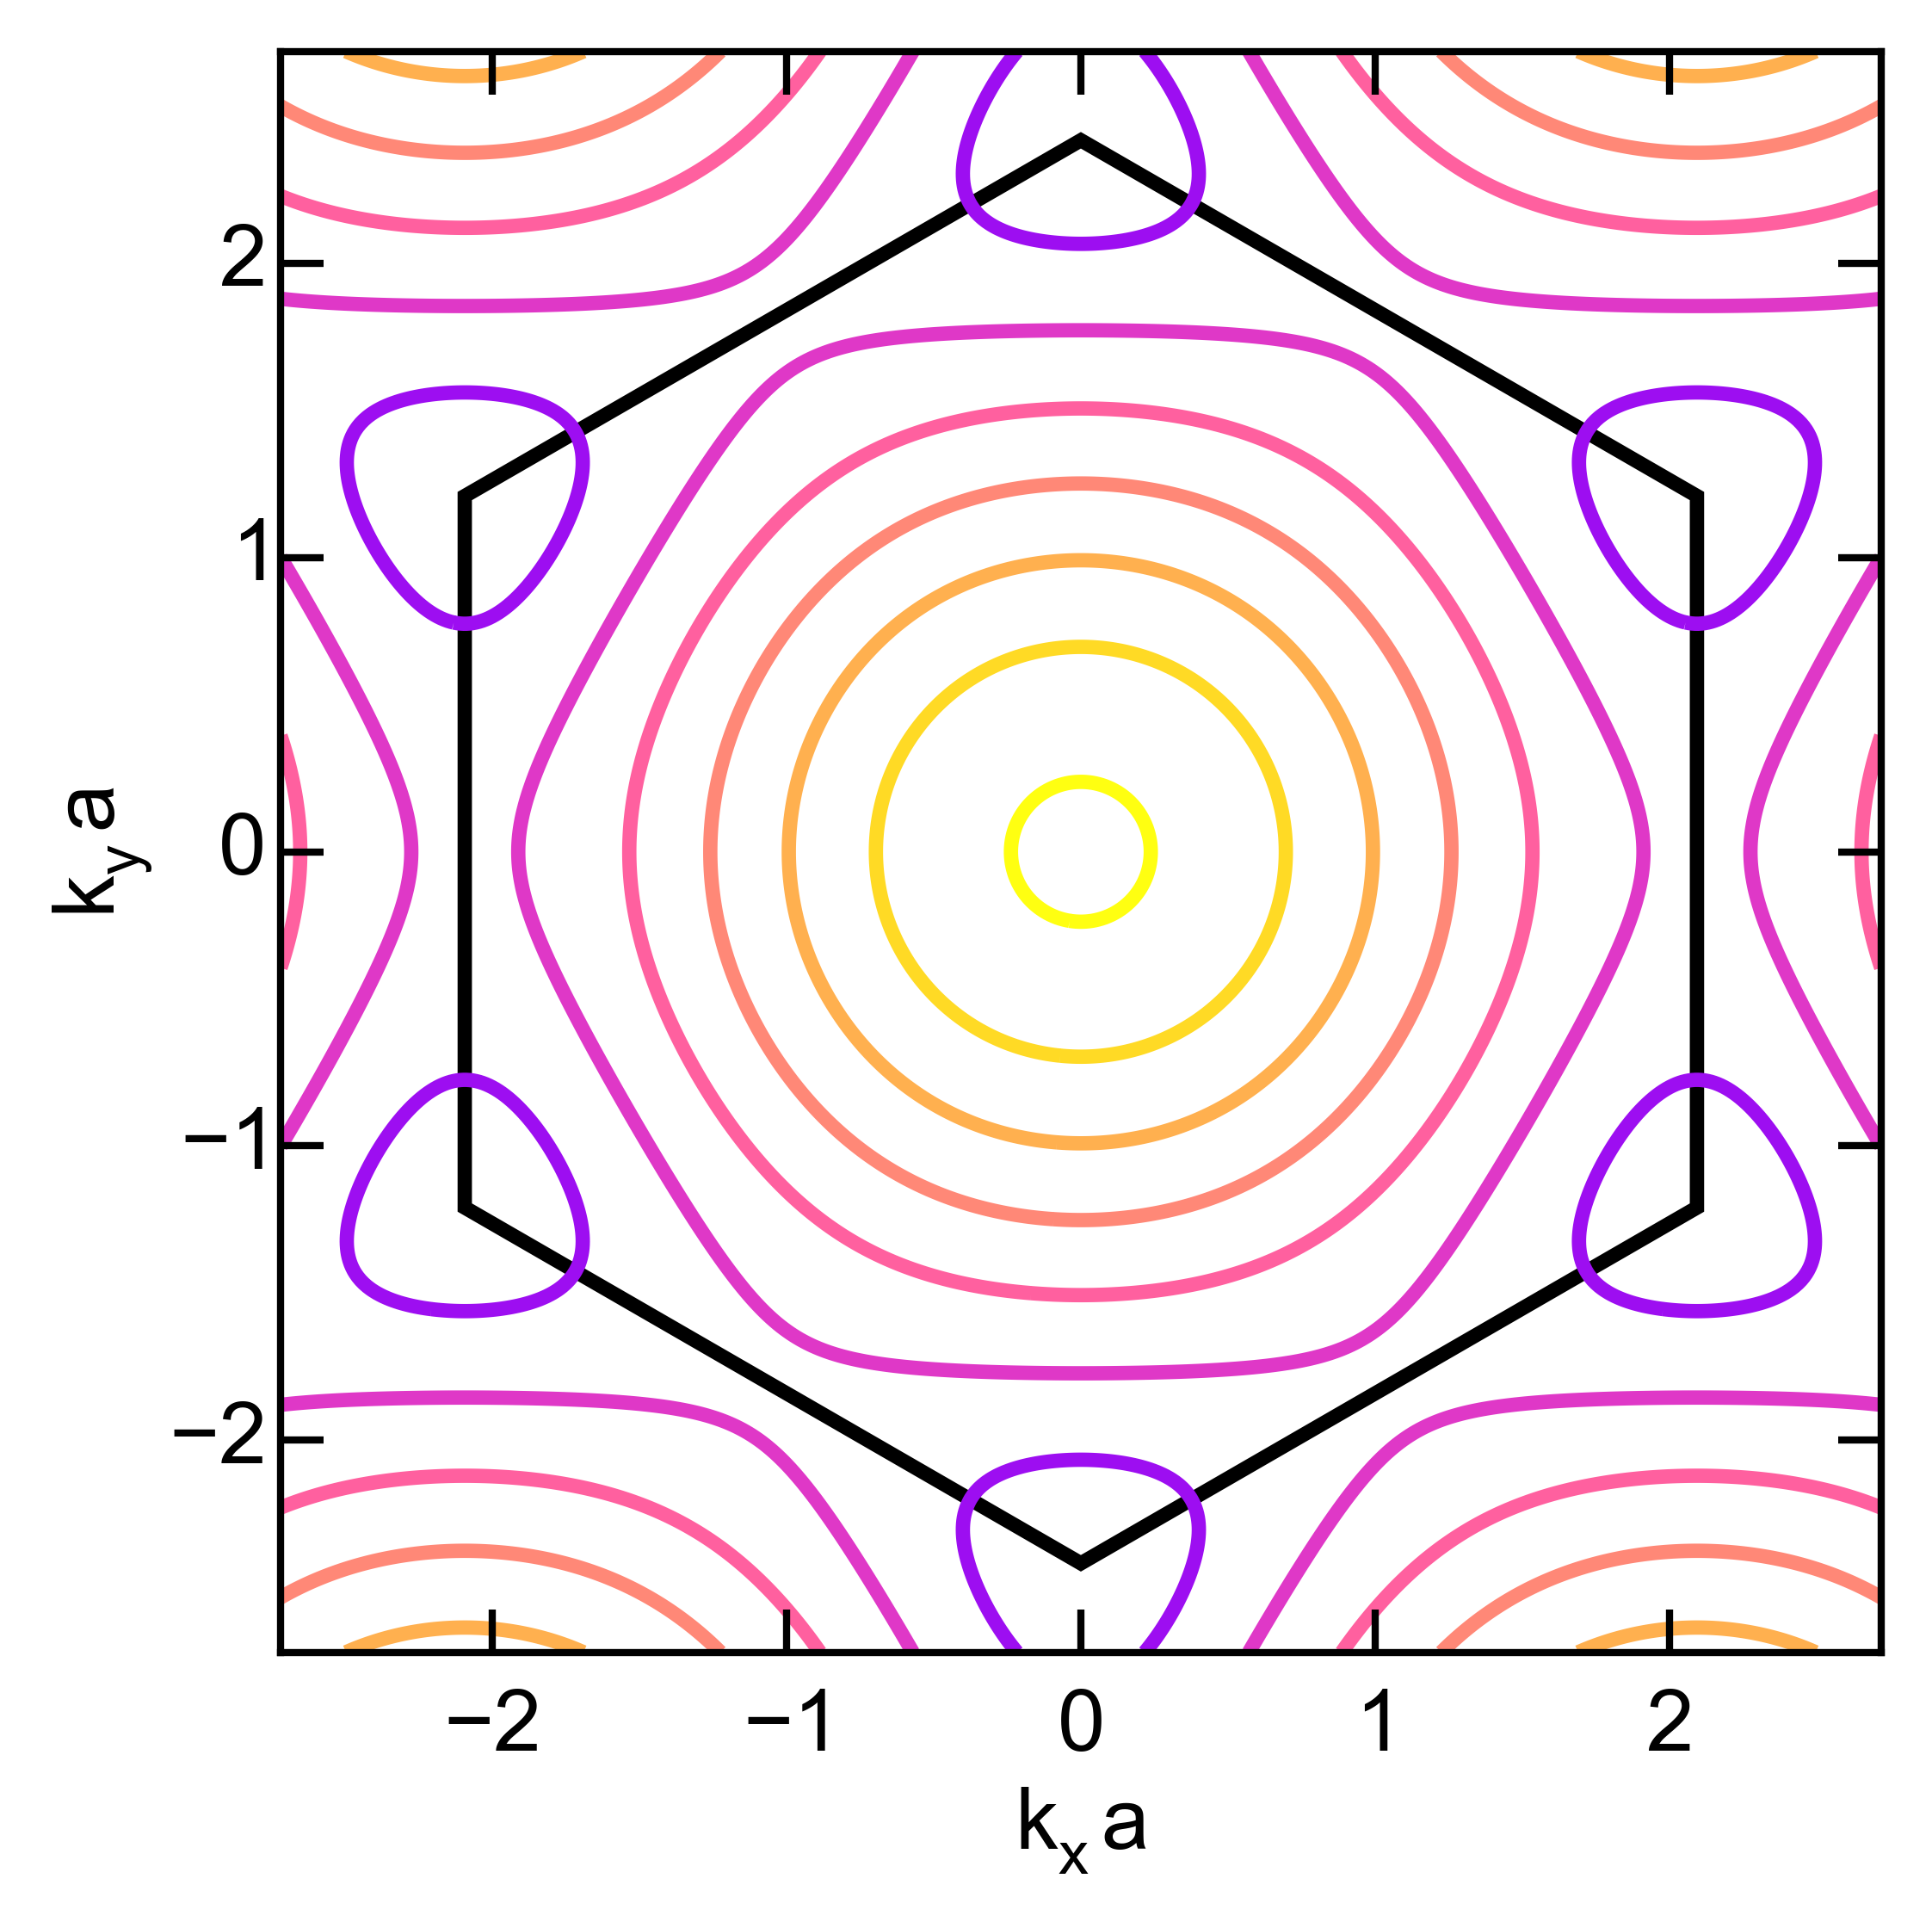

In [6]:
from matplotlib.patches import RegularPolygon

fig, ax = plt.subplots(figsize=(8,8))

ax.contour(X,Y,Z_upper, cmap = plt.cm.gnuplot2, vmin=cmin, vmax=cmax)
r = 4*np.pi/(3*np.sqrt(3))
ax.add_patch(RegularPolygon((0,0), 6, r, facecolor='none', edgecolor='k', linewidth=4))
ax.set_xlabel(r'$k_x a$', fontsize = 24)
ax.set_ylabel(r'$k_y a$', fontsize = 24)
fig.savefig(os.path.join(fig_dir, 'graphene_band_contour.png'))

Next up is the metallic nanotube band plot

    set title "Armchair (5,5) Nanotube Bandstructure (NNTB)"
    set xlabel "ka"; set ylabel "E(k)/{/Symbol g}_0"
    set nokey

    set xrange [-pi:pi]
    set yrange [-3.1:3.1]
    set xtics ("-{/Symbol p}" -pi, "-{/Symbol p}/2" -pi/2, "0" 0, "{/Symbol p}/2" pi/2, "{/Symbol p}" pi)

    f(x,q) = 1 + 4*cos(x/2)*cos(x/2) + 4*cos(pi*q/5)*cos(x/2)
    gamma = -1.0
    s = 0.0


    plot gamma*sqrt(f(x,0))/(1+s*sqrt(f(x,0))), -gamma*sqrt(f(x,0))/(1-s*sqrt(f(x,0))), \
        gamma*sqrt(f(x,1))/(1+s*sqrt(f(x,1))), -gamma*sqrt(f(x,1))/(1-s*sqrt(f(x,1))),  \
        gamma*sqrt(f(x,2))/(1+s*sqrt(f(x,2))), -gamma*sqrt(f(x,2))/(1-s*sqrt(f(x,2))),  \
        gamma*sqrt(f(x,3))/(1+s*sqrt(f(x,3))), -gamma*sqrt(f(x,3))/(1-s*sqrt(f(x,3))),  \
        gamma*sqrt(f(x,4))/(1+s*sqrt(f(x,4))), -gamma*sqrt(f(x,4))/(1-s*sqrt(f(x,4))),  \
        gamma*sqrt(f(x,5))/(1+s*sqrt(f(x,5))), -gamma*sqrt(f(x,5))/(1-s*sqrt(f(x,5))),  \
        gamma*sqrt(f(x,6))/(1+s*sqrt(f(x,6))), -gamma*sqrt(f(x,6))/(1-s*sqrt(f(x,6))),  \
        gamma*sqrt(f(x,7))/(1+s*sqrt(f(x,7))), -gamma*sqrt(f(x,7))/(1-s*sqrt(f(x,7))),  \
        gamma*sqrt(f(x,8))/(1+s*sqrt(f(x,8))), -gamma*sqrt(f(x,8))/(1-s*sqrt(f(x,8))),  \
        gamma*sqrt(f(x,9))/(1+s*sqrt(f(x,9))), -gamma*sqrt(f(x,9))/(1-s*sqrt(f(x,9)))

In [3]:
def f(x, q):
    return 1 + 4*np.cos(x/2.0)*np.cos(x/2.0) + 4*np.cos(np.pi*q/5.0)*np.cos(x/2.0)

def armchair(x,q,gamma,s,a=1.0):
    return a*gamma*np.sqrt(f(x,q))/(1+a*s*np.sqrt(f(x,q)))

def kx(x,q):
    return -(np.sqrt(7)*x/14.0) + (3*np.sqrt(3)*np.pi*q/14.0)

def ky(x,q):
    return (3*np.sqrt(21)*x/14.0) + (np.pi*q/14.0)

def f_chiral(x, q):
    return 1 + 4*np.cos(ky(x,q)/2.0)*np.cos(ky(x,q)/2.0) + 4*np.cos(np.sqrt(3)*kx(x,q)/2.0)*np.cos(ky(x,q)/2.0)

def chiral(x,q,gamma,s,a):
    return a*gamma*np.sqrt(f_chiral(x,q))/(1+a*s*np.sqrt(f_chiral(x,q)))

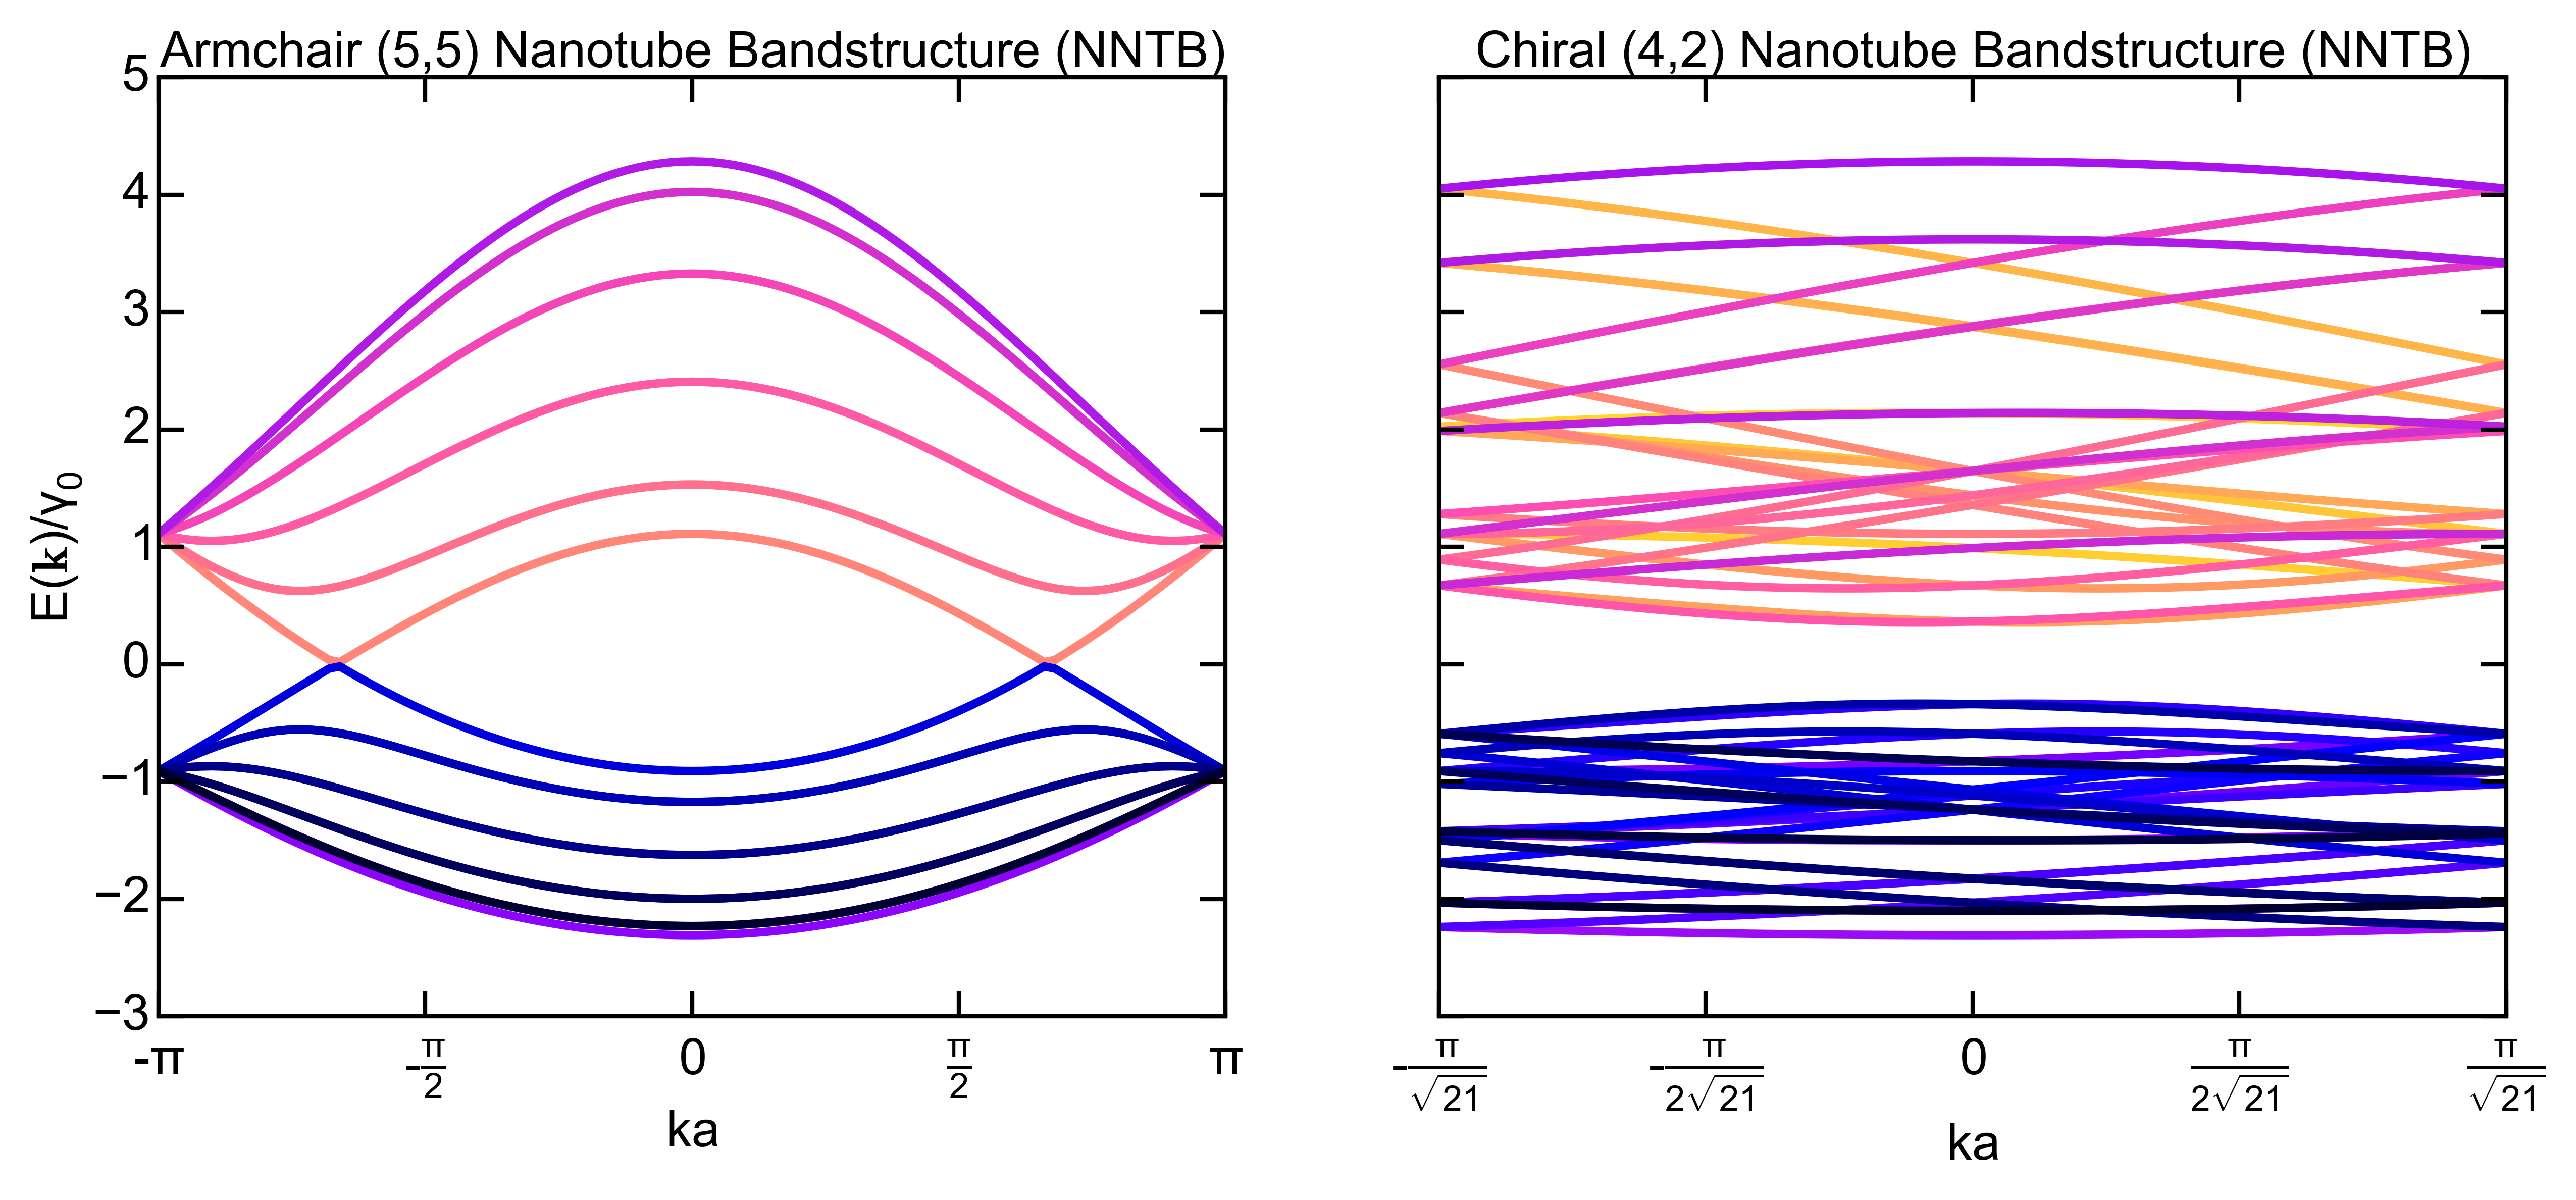

In [5]:
x = np.linspace(-np.pi, np.pi, 101)
gamma = 1.0
s = -0.1

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,8))
ind = np.insert(np.arange(-9,10), 10, 0)
color_idx = np.linspace(0.05, 0.85, len(ind))[::-1]

for i,q in enumerate(ind):
    if i<10:
        a = 1.0
    else: 
        a = -1.0
    ax1.plot(x, armchair(x,q,gamma,s, a), 
            color=plt.cm.gnuplot2(color_idx[i]), label = q)
    
x_label = [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"]
ax1.set_xticks([-np.pi, -np.pi/2.0, 0, np.pi/2.0, np.pi])
ax1.set_xticklabels(x_label)
#ax1.legend(loc='upper right')
ax1.set_xlim(-np.pi, np.pi)
#ax1.set_ylim(-3.2, 3.2)

ax1.set_title('Armchair (5,5) Nanotube Bandstructure (NNTB)')
ax1.set_ylabel(r'$E(\mathbf{k})/\gamma_0$', rotation = 90)
ax1.set_xlabel(r'$ka$')

x = np.linspace(-np.pi/np.sqrt(21),np.pi/np.sqrt(21), 101)
gamma = 1.0
s = -0.1

ind = np.insert(np.arange(-27,28), 28, 0)
color_idx = np.linspace(0.05, 0.85, len(ind))[::-1]

for i,q in enumerate(ind):
    if i<28:
        a = 1.0
    else: 
        a = -1.0
    ax2.plot(x, chiral(x,q,gamma,s, a), 
            color=plt.cm.gnuplot2(color_idx[i]), label = q)
    
x_label = [r"$-\frac{\pi}{\sqrt{21}}$", r"$-\frac{\pi}{2\sqrt{21}}$", r"$0$", 
           r"$\frac{\pi}{2\sqrt{21}}$", r"$\frac{\pi}{\sqrt{21}}$"]
ax2.set_xticks([-np.pi/np.sqrt(21), -np.pi/(2.0*np.sqrt(21)), 0, 
               np.pi/(2.0*np.sqrt(21)), np.pi/np.sqrt(21)])
ax2.set_xticklabels(x_label)
#ax2.legend(loc='upper right')
ax2.set_xlim(-np.pi/np.sqrt(21),np.pi/np.sqrt(21))
#ax2.set_ylim(-3.2, 3.2)

ax2.set_title('Chiral (4,2) Nanotube Bandstructure (NNTB)')
#ax2.set_ylabel(r'$E(\mathbf{k})/\gamma_0$', rotation = 90)
ax2.set_xlabel(r'$ka$')

fig.savefig(os.path.join(fig_dir, 'cnt_types.png'), dpi=300)

Last, plot the chiral nanotube bandstructure...

    set title "Chiral (4,2) Nanotube Bandstructure (NNTB)"
    set xlabel "ka"; set ylabel "E(k)/{/Symbol g}_0"
    set nokey

    set xrange [-pi/sqrt(21):pi/sqrt(21)]
    set yrange [-3.2:3.2]
    set xtics ("-{/Symbol p}/{/Symbol \326}21" -pi/sqrt(21), "-{/Symbol p}/2{/Symbol \326}21" -pi/2/sqrt(21), "0" 0, "{/Symbol p}/2{/Symbol \326}21" pi/2/sqrt(21), "{/Symbol p}/{/Symbol \326}21" pi/sqrt(21))

    kx(x,q) = -(sqrt(7)*x/14) + (3*sqrt(3)*pi*q/14)
    ky(x,q) = (3*sqrt(21)*x/14) + (pi*q/14)
    f(x,q) = 1 + 4*cos(ky(x,q)/2)*cos(ky(x,q)/2) + 4*cos(sqrt(3)*kx(x,q)/2)*cos(ky(x,q)/2)
    gamma = -1.0
    s = 0.0


    plot gamma*sqrt(f(x,0))/(1+s*sqrt(f(x,0))), -gamma*sqrt(f(x,0))/(1-s*sqrt(f(x,0))), \
        gamma*sqrt(f(x,1))/(1+s*sqrt(f(x,1))), -gamma*sqrt(f(x,1))/(1-s*sqrt(f(x,1))),  \
        ...
        gamma*sqrt(f(x,26))/(1+s*sqrt(f(x,26))), -gamma*sqrt(f(x,26))/(1-s*sqrt(f(x,26))),  \
        gamma*sqrt(f(x,27))/(1+s*sqrt(f(x,27))), -gamma*sqrt(f(x,27))/(1-s*sqrt(f(x,27)))

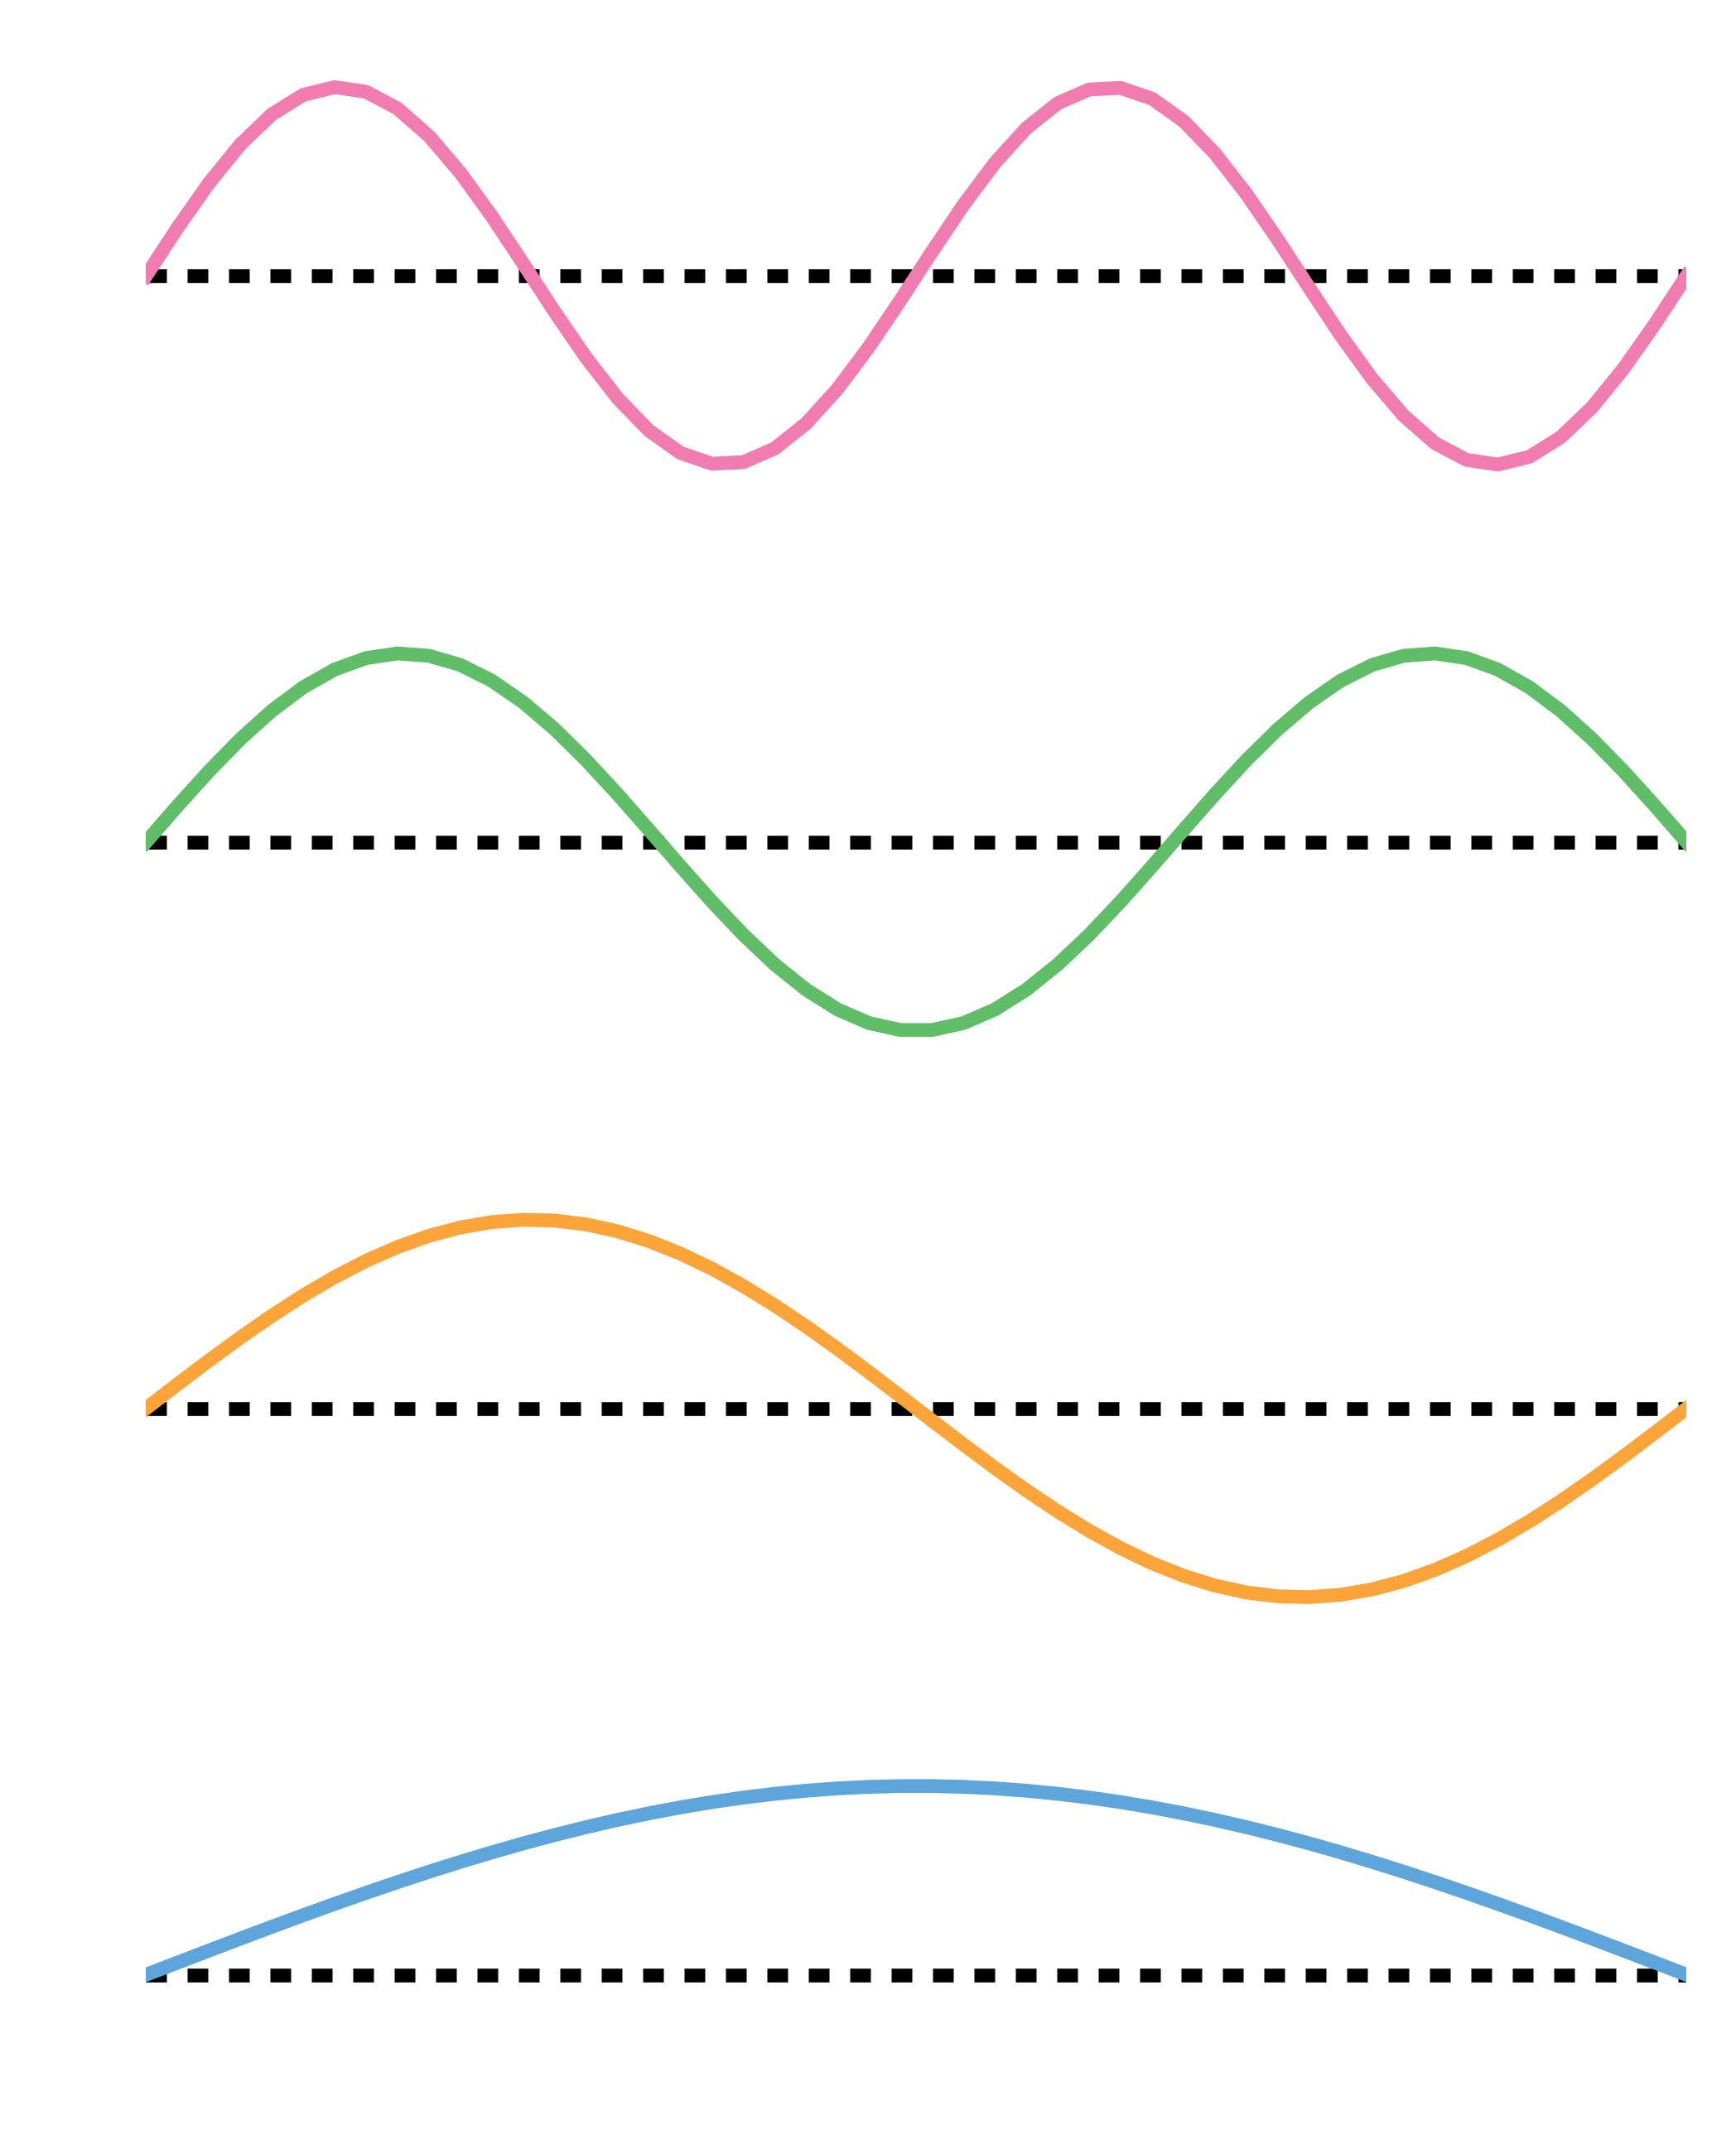

In [32]:
x = np.linspace(0,2*np.pi)
y1 = np.sin(x/2.0)
y2 = np.sin(x) + 3.0
y3 = np.sin(3.0*x/2.0) + 6.0
y4 = np.sin(2.0*x) + 9.0

fig, ax = plt.subplots(figsize = (8, 10))
ax.plot(x, np.ones(len(x))*0, 'k--')
ax.plot(x, y1)
ax.plot(x, np.ones(len(x))*3, 'k--')
ax.plot(x, y2)
ax.plot(x, np.ones(len(x))*6, 'k--')
ax.plot(x, y3)
ax.plot(x, np.ones(len(x))*9, 'k--')
ax.plot(x, y4)
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-0.1, 10.1)
# ax.yaxis.set_ticklabels([])
# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_visible(False)
# ax.xaxis.set_visible(False)
ax.axis('off')
fig.savefig(os.path.join(fig_dir, 'qd_levels.png'), facecolor='w')